# CS 254 Assignment 4

Before we start, please put your name in following format:

FirstName Lastname, netid //   e.g.) Safwan Wshah, swshah

To run your code:

*   Save your code to google drive, right click and open using google colab.
*   rename the assigmnent file to Yourfirstname_lastname_Assignment2.ipynb.
*   Under google drive root directory create the following folder and make sure all your assignments are under this directory (CS254/CS254-Assignments/yournetid-A#). For example, for assignment #3 it should look like this
CS254/CS254-Assignments/swshah-A3



To submit, please follow the following steps:
*   Zip your assignment and name it yournetid-A#.zip For example for assignment 2, it should be swshah-A3.zip.
* Submit to blackboard.

### Google Colab Setup
Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Now recall the path in your Google Drive where you uploaded this notebook, fill it in below. If everything is working correctly then running the folowing cell should print the filenames from the assignment:


['yourfirst_last_name_Assignment_4.ipynb']

In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment, it should be under CS254/CS254-Assignments/netid-A2
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS254/CS254-Assignments/asmith16-A4' # change this directory to yours
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['images', 'andrew_smith_Assignment_4.ipynb']


# Assignment 4

Below are the import statements and custom functions you will need to use in this assignment. Where relevant, documentation pages for necessary objects and functions have been linked in the instructions.

In this assignment, you will be performing basic image classification using simple labeled images from the MNIST database - specifically, numbers 0 through 9.  Image classification is a higher-dimensional problem, and requires more powerful tools than the simpler classification problems like you have seen in Assignment 3.

You will visualize the data, split it into training, validation, and testing groups, and then atempt to model it with both logistic regression and support vector machine methods from the sklearn library (you don't need to implement those from scratch). After modeling, you will analyze your results and determine how well each model performed, selecting and calculating performance metrics that justify your conclusions.

In [ ]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_digits

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
#function that you will use to convert matrix to dataframe, useful for visulization.
def conf_matrix_to_df(conf_matrix, target_names):
    return pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

## Part 0: Prepare the data

#### Q1) (5 points) Load Data
- Using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html">load_digits()</a> function from sklearn's datasets library, load the numerical MNIST data.
- You will be using this same dataset for the entire assignment.



In [ ]:
databunch = datasets.load_digits()
print(databunch.data.shape)

(1797, 64)


In [ ]:
# Test function, You will not need this dataframe for any of the following questions.
# The purpose of making this dataframe is to practice this paradigm. You should get similar ot the below table.
df = pd.DataFrame(databunch.data)
df['target'] = databunch.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


#### Q2) (10 points) Visualize data-points
Use matplotlib.pyplot's imshow function to plot and display the first five items in our dataset. The title of the plot should be the target value associated with the data on display - a target value of 9, for example, will be the title of an image plot of data showing the number 9.
You will need to reshape your data from a flat array into a square matrix in order to correctly display the images - documentation of pyplot's imshow function may be found <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html"> <b> here </b></a>

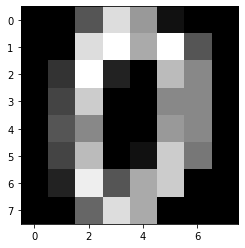

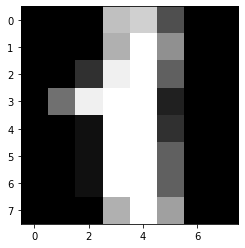

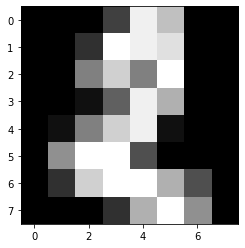

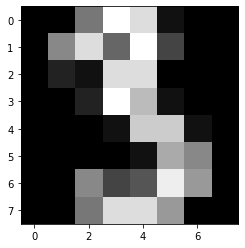

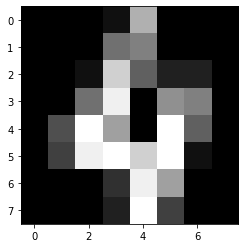

In [ ]:
for i in range(5):
    # add your code here, you should get similar to the below images.
    plt.figure()
    plt.gray()
    plt.imshow(databunch.images[i])


#### Grad Students Question (Extra credit for Undergraduates) ) (20 points) Dimensionality Reduction
- Using Principle Component Analysis, find the data's two primary components.
- Once you have done this, plot the data by these two components with a scatterplot. Color the datapoints according to their classification - all zeros should be one color, as should all ones, all twos, and so on. While this data is high-dimensional and therefore going to overlap, all points within the same class should be roughly grouped together.

Hint: The PCA object in SKlearn operates the same way as the PolynomialFeatures object. That is, once you create a PCA object with some parameters, you can use it to "fit_transform" your data.<br> https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

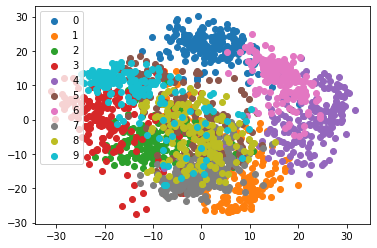

In [ ]:
pca = # add your code here, create the principle compoenet using PCA object
transformed_data = # add your code here, reduce the data dimnisions to two diminsions

# add your code here to visulzie your data, you should get simialr image as bellow.


#### Q3) (10 points) Train Test Split
- To validate model performance and generalization ability, we need to create training and testing groups.
- Use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.htmlsklearn"> train_test_split function </a> to split your dataset into training data and testing data. This function has already been imported; you simply need to correctly call it and store its output.


<b>Important: when you call this function, you must use a test size of 0.25 and a random_state of 0.*</b>

In [ ]:
X = databunch.data
y = databunch.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
#$ test function, If correctly split, your data and targets should be of shapes
# Training: x: (1347, 64) y: (1347,), Testing:  x: (450, 64)  y: (450,)
print("Training x:", x_train.shape,"y:", y_train.shape)
print("Testing x:", x_test.shape,"y:", y_test.shape)

Training x: (1347, 64) y: (1347,)
Testing x: (450, 64) y: (450,)


## Part 1: Regression

#### Q4)  (15 points) Logistic Regression model
- Create a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression"> LogisticRegression</a> object. This object has already been imported from sklearn's linear_model class. You do not need to add any additional arguments to the object's initialization, the default settings will be fine.
- Call LogisticRegression's .fit() function on your model, using your training data as parameters.
- Call LogisticRegression's .predict() function on your model using your testing data as a parameter and store the results.

In [ ]:
# add your code here
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_predict = clf.predict(x_test)
# print(y_predict)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 9 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 1 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 9 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 8 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 3 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 3 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 7 8 2 8 4 3 7 2 6 9 9 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 8 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 1 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 1 1 5 5 9 1 3 7 0 0 3 0 4 5 8 9 3 4 3 1 8 9 8 3 6 3 1 6 2
 1 7 5 5 1 9]


#### Q5) (10 points) Visualization
- Use sklearn's <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html">confusion matrix</a> function to obtain a confusion matrix of your results.
- print this confusion matrix.
- Display this confusion matrix as a heatmap using pyplot's imshow() function, with true class names along the x axis and predicted class names along the y axis.

Recall the general form of a confusion matrix:

![alt_text](https://drive.google.com/uc?id=1ddazyReK2QGcSFwt7MDBswOJchsSGnza)


This example is a simple binary - classes are either "yes" or "no". The matrix you create will be for ten classes - 0 through 9. The value at a given index [i,j] will indicate how many times your model classified data from class i as being from class j. A correct classification has been made when i and j are the same. Therefore, if your model is working correctly, you should see a diagonal line of higher numbers running from [0,0] to [9,9] in your matrix, and very low numbers everywhere else.

In [ ]:
# add your code here, you should get similar to the results below.
conf_matrix = confusion_matrix(y_test, y_predict)
conf_matrix_to_df(conf_matrix, databunch.target_names)

,0,1,2,3,4,5,6,7,8,9
0,37,0,0,0,0,0,0,0,0,0
1,0,40,0,0,0,0,0,0,2,1
2,0,1,40,3,0,0,0,0,0,0
3,0,0,0,43,0,0,0,0,1,1
4,0,0,0,0,37,0,0,1,0,0
5,0,0,0,0,0,46,0,0,0,2
6,0,1,0,0,0,0,51,0,0,0
7,0,0,0,1,1,0,0,46,0,0
8,0,3,1,0,0,0,0,0,43,1
9,0,0,0,0,0,1,0,0,1,45


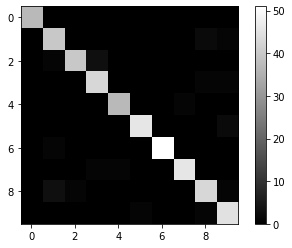

In [ ]:
# add your code here to visualize the confusion matrix heat map, the output should look similar to the image below.
# hint use plt.imshow and plt.colorbar() functions
plt.imshow(conf_matrix)
plt.colorbar()


#### Q6) (15 points) Performance Metrics
- Write your own code to calculate the precision and recall values for all classes. The basic forumulas for precision and recall are provided below.

![alt_text](https://drive.google.com/uc?id=1yXpun8xeq87UI6kCKILkdaHPiQNtWUe5)

Compare your results with the sklearn's classification_report function to make sure your are getting the same results.

In [ ]:
# add your code here to call classification_report from sklearn. you should get similar to the output below
names = [str(x) for x in range(10)]
print(classification_report(y_test, y_predict, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [ ]:
# implement your own code to calacuate precision and recall
def custom_precision_recall(conf_matrix, target_names):
    # write your code here
    # variable inits
    tpfn = np.zeros(len(target_names))
    tpfp = tpfn.copy()
    tp = tpfn.copy()

    # output inits
    prec = tpfn.copy()
    recall = tpfn.copy()

    # for each possible answer (0 -> 9) ()
    for i in range(len(target_names)):
      # gets the tpfp and tpfn from the column or row respectively
      # this is shown in the conf_matrix diagram with the 2 different ovals around tpfp adn tpfn
      tpfn[i] = conf_matrix[i,:].sum()
      tpfp[i] = conf_matrix[:,i].sum()

      for j in range(len(target_names)):
        # if on the diagnol of the matrix
        if i == j:
          tp[i] = conf_matrix[i,j]

      # calc precision and recall for that i repeat
      prec[i] = tp[i] / tpfp[i]
      recall[i] = tp[i] / tpfn[i]

    return prec, recall

In [ ]:
# Test function for custom_precision_recall,
# you should get similar to the below values that also should match the classification_report results from sklearn.
prec, recall = custom_precision_recall(conf_matrix, np.arange(10))

print("i, precision, recall")
for i in range(len(prec)):
  print(str(i) + ', ' + str(prec[i]) + ', ' + str(recall[i]))

i, precision, recall
0, 1.0, 1.0
1, 0.8888888888888888, 0.9302325581395349
2, 0.975609756097561, 0.9090909090909091
3, 0.9148936170212766, 0.9555555555555556
4, 0.9736842105263158, 0.9736842105263158
5, 0.9787234042553191, 0.9583333333333334
6, 1.0, 0.9807692307692307
7, 0.9787234042553191, 0.9583333333333334
8, 0.9148936170212766, 0.8958333333333334
9, 0.9, 0.9574468085106383


## Part 2: Support Vector Machine

#### Q7) (10 points) SVM model
- Create an <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVC</a> object, imported from sklearn's svm module, use linear or poly kernel.
- Call the .fit() function on your model with x_train and y_train as parameters.
- Call the .predict() function on your model with x_test as a parameter and store the results.

In [ ]:
# add your code here ...
clf = SVC(kernel='poly')
clf.fit(x_train, y_train)
y_predictsvc = clf.predict(x_test)


#### Q8) (10 points) Visualization
- Use sklearn's confusion matrix function to obtain a confusion matrix in np.array format
- Print confusion matrix.
- Display this confusion matrix as a heatmap using matplotlib.pyplot's .imshow() function.*

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predictsvc)
conf_matrix_to_df(conf_matrix, databunch.target_names)
# results depends on your kernal choice, so you might have slightly different results that what shown below.

,0,1,2,3,4,5,6,7,8,9
0,37,0,0,0,0,0,0,0,0,0
1,0,43,0,0,0,0,0,0,0,0
2,0,0,44,0,0,0,0,0,0,0
3,0,0,1,44,0,0,0,0,0,0
4,0,0,0,0,38,0,0,0,0,0
5,0,0,0,0,0,47,0,0,0,1
6,0,1,0,0,0,0,51,0,0,0
7,0,0,0,0,0,0,0,48,0,0
8,0,1,0,0,0,0,0,0,47,0
9,0,0,0,0,0,1,0,0,0,46


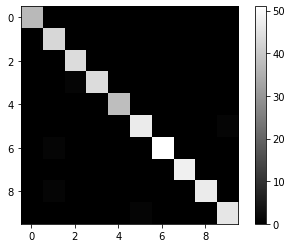

In [ ]:
# add your code here, you should get similar results are below
# (the heatmap depends on your poly or linear kernal choice, so it might be slightly different that yours
# this heat map for poly kernal)
plt.imshow(conf_matrix)
plt.colorbar()

#### Q9) (15 points) Performance Metrics and Comparison
- Create a function to obtain useful metrics for your SVM's performance
- There is no specific correct answer for a "useful metric", but make sure you can justify your metrics/process

In [ ]:
# add your code here
prec, recall = custom_precision_recall(conf_matrix, np.arange(10))

print("i, precision, recall")
for i in range(len(prec)):
  print(str(i) + ', ' + str(prec[i]) + ', ' + str(recall[i]))

i, precision, recall
0, 1.0, 1.0
1, 0.9555555555555556, 1.0
2, 0.9777777777777777, 1.0
3, 1.0, 0.9777777777777777
4, 1.0, 1.0
5, 0.9791666666666666, 0.9791666666666666
6, 1.0, 0.9807692307692307
7, 1.0, 1.0
8, 1.0, 0.9791666666666666
9, 0.9787234042553191, 0.9787234042553191


- How does this performance compare to that of the regression model? (explain why this might be)

In [ ]:
# Add your answer here ..
# SVM is great at classification when the data set gets large in features (n = 64 (bc of 8x8 image)) and with 1797 instances the data set is quite long
# The overall accuracy difference between the Logistic and SVM methods. The SVM being slightly more accurate. This problem is much better suited
# for the SVM models using the poly vs linear curve is a matter of the data and personal selection. SVM is just more accuate and efficent
# with data of this scale and dimensionality.